In [1]:
# dataset: letterdata.csv
# location: https://mitu.co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('letterdata.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
df.shape

(20000, 17)

In [9]:
list(df.columns)

['letter',
 'xbox',
 'ybox',
 'width',
 'height',
 'onpix',
 'xbar',
 'ybar',
 'x2bar',
 'y2bar',
 'xybar',
 'x2ybar',
 'xy2bar',
 'xedge',
 'xedgey',
 'yedge',
 'yedgex']

In [11]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [15]:
# separate input and output

x = df.drop('letter', axis = 1)

y = df['letter']

In [17]:
np.unique(y)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [25]:
y.value_counts();

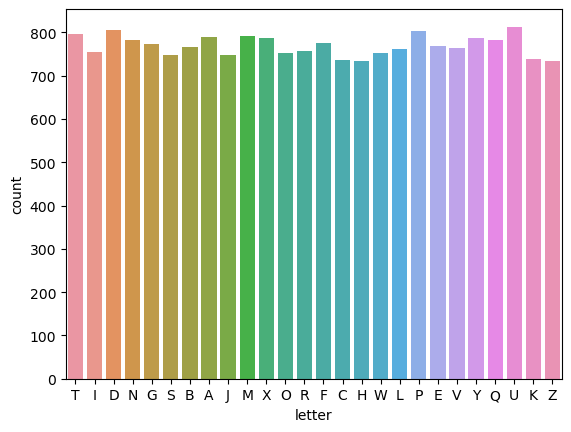

In [21]:
sns.countplot(x = y);

### Cross Validation

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   random_state= 0,
                                                   test_size= 0.20)

In [32]:
x_train.shape, y_train.shape

((16000, 16), (16000,))

### Build the model

In [35]:
from sklearn.svm import SVC

In [82]:
clf = SVC(kernel = 'poly')

In [84]:
clf.fit(x_train, y_train)

SVC(kernel='poly')

### Performance Eval

In [86]:
y_pred = clf.predict(x_test)

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

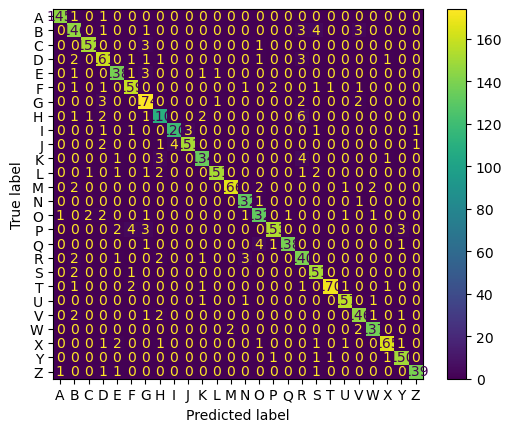

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [89]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       0.88    

In [90]:
accuracy_score(y_test, y_pred)

0.95425

In [91]:
# poly = 0.9542
# RBF = 0.9335
# linear = 0.8655
# sigmoid = 0.029

In [99]:
new1 = [[3,4,3,6,2,3,8,6,10,7,6,15,0,8,7,8]]
new2 = [[2,3,3,4,2,8,8,4,2,7,8,10,2,9,4,8]]
new3 = [[7,9,6,4,3,11,7,4,5,8,3,5,5,9,4,8]]

In [101]:
clf.predict(new1) ,clf.predict(new2), clf.predict(new3)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


(array(['E'], dtype=object),
 array(['Q'], dtype=object),
 array(['H'], dtype=object))